In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
train_file = "../input/train.csv"
test_file = "../input/test.csv"
output_file = "submission.csv"

In [4]:
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(
    raw_data[:,1:], raw_data[:,0], test_size=0.1)

Text(0.5, 1.0, '28x28 data')

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


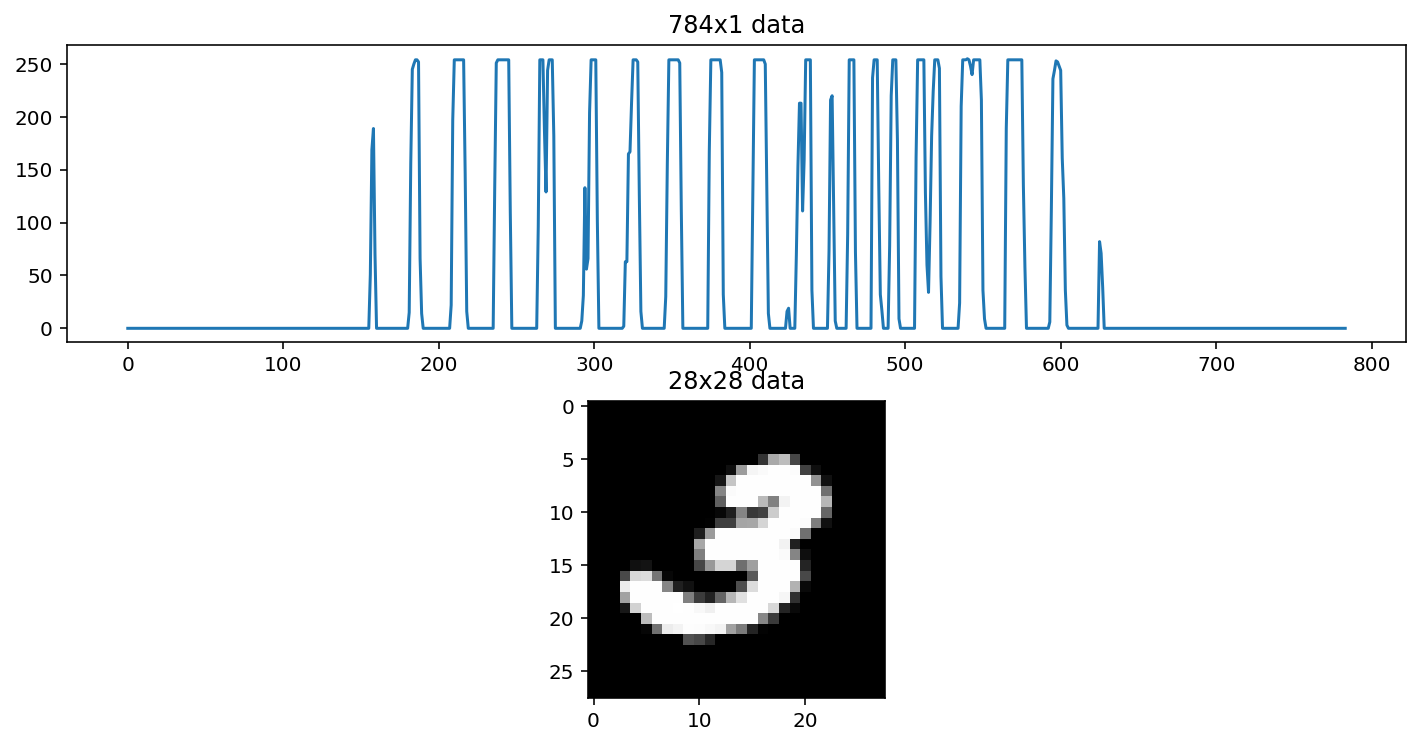

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[0].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [7]:
x_train = x_train.astype("float32")/255.
x_val = x_val.astype("float32")/255.

In [8]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
#example:
print(y_train[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [9]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [10]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [12]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [13]:
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=16),
                           steps_per_epoch=500,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val[:400,:], y_val[:400,:]), #For speed
                           callbacks=[annealer])

Epoch 1/20
 - 17s - loss: 0.9232 - acc: 0.7051 - val_loss: 0.2784 - val_acc: 0.9225
Epoch 2/20
 - 16s - loss: 0.3777 - acc: 0.8804 - val_loss: 0.1273 - val_acc: 0.9625
Epoch 3/20
 - 16s - loss: 0.2693 - acc: 0.9165 - val_loss: 0.0919 - val_acc: 0.9775
Epoch 4/20
 - 15s - loss: 0.2481 - acc: 0.9286 - val_loss: 0.0827 - val_acc: 0.9675
Epoch 5/20
 - 15s - loss: 0.2158 - acc: 0.9349 - val_loss: 0.0493 - val_acc: 0.9900
Epoch 6/20
 - 15s - loss: 0.1731 - acc: 0.9497 - val_loss: 0.0718 - val_acc: 0.9775
Epoch 7/20
 - 16s - loss: 0.1629 - acc: 0.9499 - val_loss: 0.0534 - val_acc: 0.9825
Epoch 8/20
 - 17s - loss: 0.1529 - acc: 0.9546 - val_loss: 0.0543 - val_acc: 0.9800
Epoch 9/20
 - 16s - loss: 0.1386 - acc: 0.9591 - val_loss: 0.0313 - val_acc: 0.9875
Epoch 10/20
 - 17s - loss: 0.1428 - acc: 0.9594 - val_loss: 0.0184 - val_acc: 0.9925
Epoch 11/20
 - 17s - loss: 0.1250 - acc: 0.9617 - val_loss: 0.0276 - val_acc: 0.9900
Epoch 12/20
 - 18s - loss: 0.1154 - acc: 0.9681 - val_loss: 0.0268 - val_a

In [14]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0316, final accuracy: 0.9919


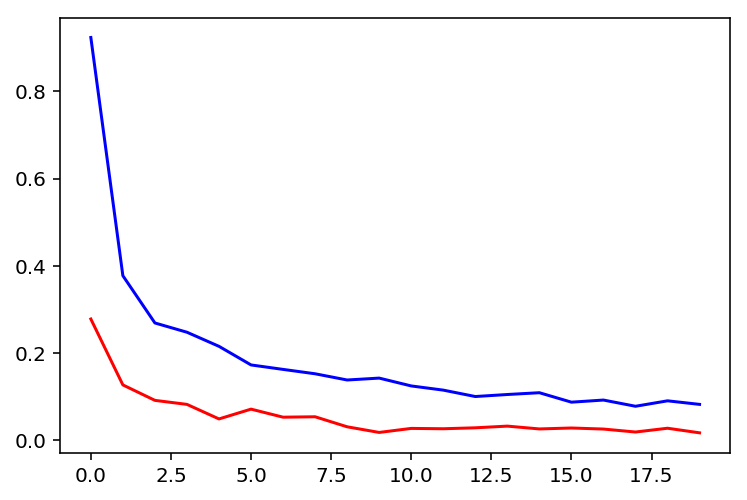

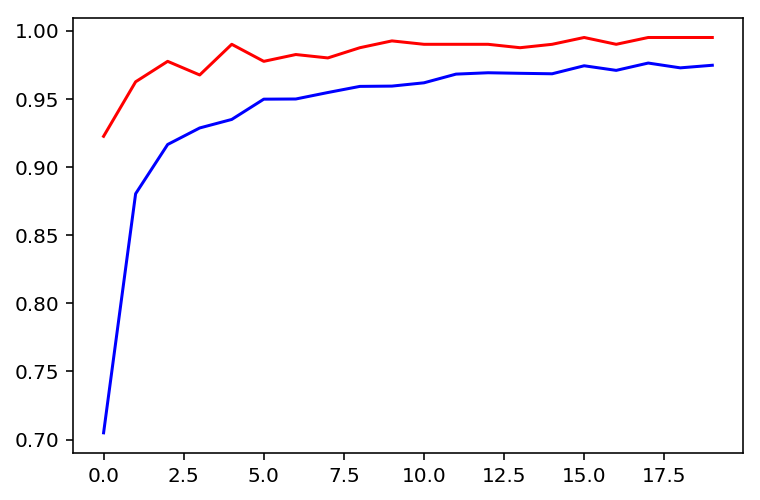

In [15]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [16]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[407   0   0   2   0   0   1   0   1   0]
 [  0 475   0   0   0   0   0   2   1   0]
 [  0   1 427   0   0   0   0   1   0   0]
 [  0   0   1 410   0   0   1   0   2   0]
 [  0   0   1   0 442   0   0   0   0   0]
 [  1   0   0   0   0 367   1   0   1   1]
 [  0   0   0   0   0   1 418   0   1   0]
 [  0   0   4   0   1   0   0 454   0   1]
 [  0   0   0   0   1   0   1   0 391   0]
 [  1   0   0   0   2   1   0   0   2 375]]


In [17]:
mnist_testset = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1)/255.

In [18]:
y_hat = model.predict(x_test, batch_size=64)

In [19]:
y_pred = np.argmax(y_hat,axis=1)

In [20]:
with open(output_file, 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))

In [22]:
result = pd.read_csv(output_file)

![image-20190311164507886](https://ws3.sinaimg.cn/large/006tKfTcly1g0yy7arp2zj31lw09ago0.jpg)

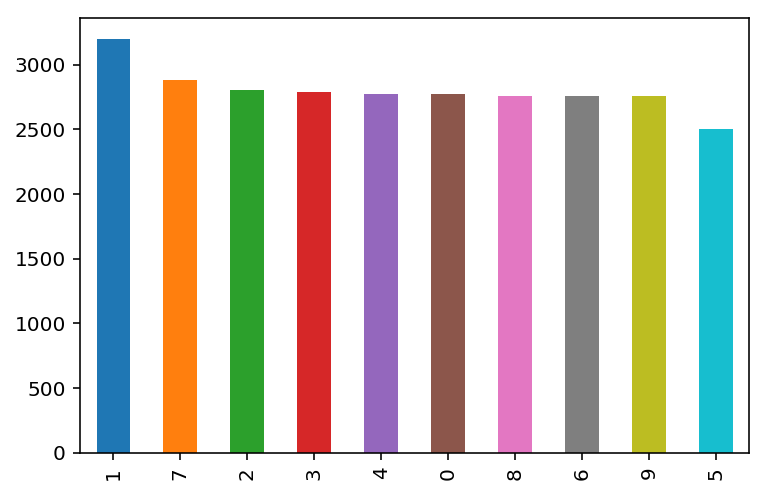

In [25]:
result['Label'].value_counts().plot(kind='bar')